# 7 - ElasticNet Regression

**Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.**

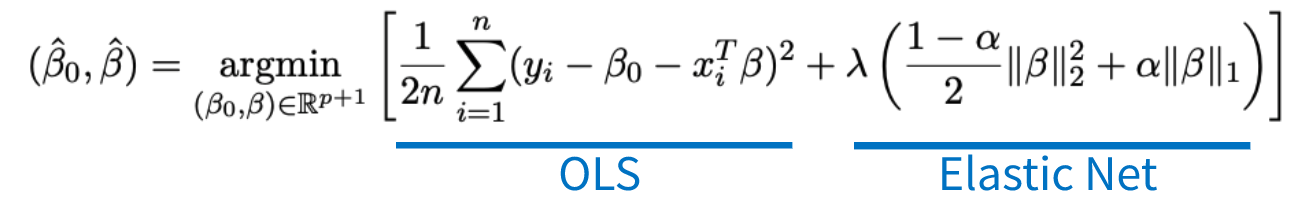

# Get dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Hitters.csv")
data = df.copy()
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Check null values
data.isnull().values.any()

True

In [4]:
# Clear null values
data = data.dropna()
data.isnull().values.any()

False

# Create Dummy Variables

In [5]:
dummies = pd.get_dummies(data[["League","Division","NewLeague"]])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [6]:
y = data["Salary"]

X_pre = data.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_pre,dummies[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


# Split train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 19)
(210,)
(53, 19)
(53,)


# Import model

In [10]:
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

elasticNetModel = ElasticNet(alpha=0.2).fit(X_train,y_train)
elasticNetModel.coef_

array([-2.18783036e+00,  7.88419133e+00,  4.30103779e-01, -1.64223864e+00,
       -1.64678535e+00,  6.65691687e+00, -6.31039216e+00, -2.31838065e-01,
        2.33118916e-01,  6.14737856e-01,  1.60030338e+00,  9.27515922e-01,
       -9.12679907e-01,  2.59015559e-01,  3.80225372e-01, -4.48935156e+00,
        2.16220007e+01, -6.97194035e+01,  3.90524221e-02])

# Prediction

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = elasticNetModel.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f"MSE Loss = {mse}")
print(f"RMSE Loss = {rmse}")

MSE Loss = 79969.49354116706
RMSE Loss = 282.78877902273115


# Model Tuning

In [14]:
from sklearn.linear_model import ElasticNetCV

elasticNetCVModel = ElasticNetCV(alphas=None,cv=10,max_iter=10000,normalize=True).fit(X_train,y_train)
print(f"Optimum lambda value = {elasticNetCVModel.alpha_}")

Optimum lambda value = 0.03713982935261789


# Tuned Model

In [15]:
elasticNetTunedModel = ElasticNet(alpha=elasticNetCVModel.alpha_).fit(X_train,y_train)

# Prediction with tuned model
y_pred_tuned = elasticNetTunedModel.predict(X_test)
mse_tuned = mean_squared_error(y_test,y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print(f"MSE Tuned Loss = {mse_tuned}")
print(f"RMSE Tuned Loss = {rmse_tuned}")

MSE Tuned Loss = 78481.58734263008
RMSE Tuned Loss = 280.14565379928723
